<a href="https://colab.research.google.com/github/caballeroarturo/ejemplosR/blob/main/Sesion4/Ejemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJEMPLO 03: DISTRIBUCIÓN NORMAL, NORMAL ESTÁNDAR Y VALORES Z

### Aproximación de la distribución normal a la binomial
"La distribución normal tiene un papel fundamental en muchas áreas de estudio, ya que, de forma natural muchas variables siguen o pueden aproximarse a esta distribución.

Algunos puntos importantes de esta distribución son:

    - Tiene dos parámetros: X~N(Media, SD)
    - Es simétrica y con forma de campana"

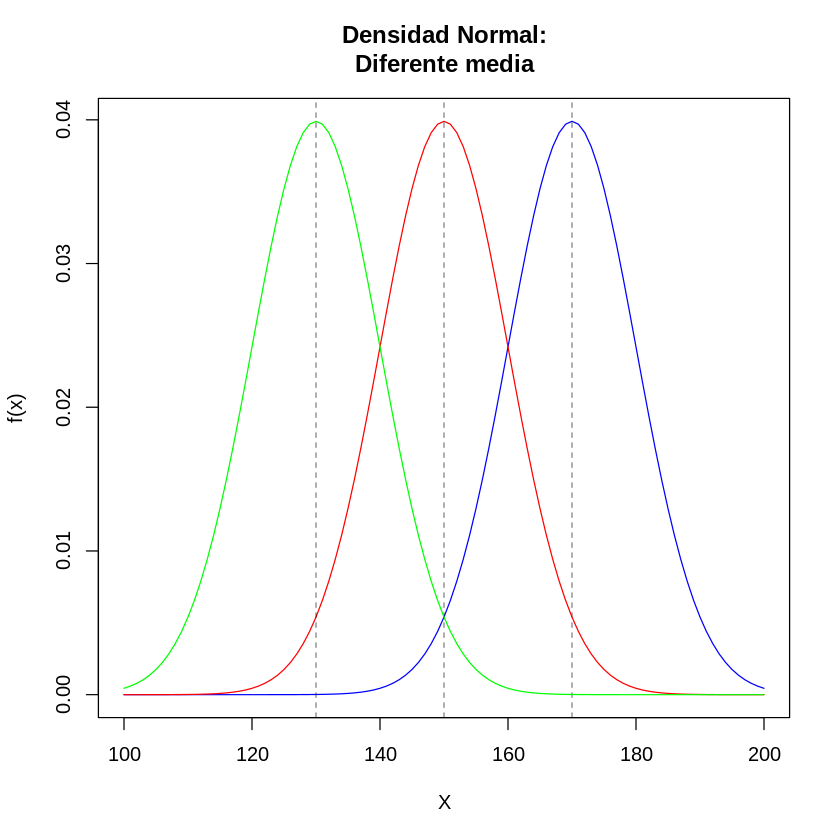

In [28]:
{
  curve(dnorm(x, mean = 170, sd = 10), from = 100, to = 200,
        col='blue', main = "Densidad Normal:\nDiferente media",
        ylab = "f(x)", xlab = "X")
  abline(v = 170, lwd = 0.5, lty = 2)
  curve(dnorm(x, mean = 150, sd = 10), from = 100, to = 200,
        col='red', add = TRUE)
  abline(v = 150, lwd = 0.5, lty = 2)
  curve(dnorm(x, mean = 130, sd = 10), from = 100, to = 200,
        col='green', add = TRUE)
  abline(v = 130, lwd = 0.5, lty = 2)
}

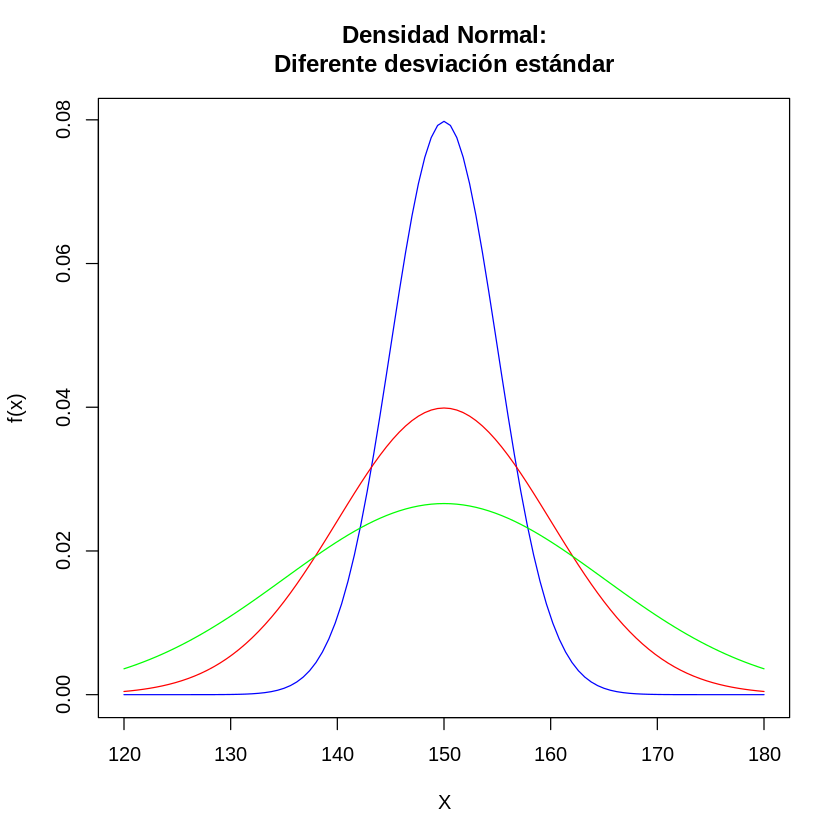

In [29]:
{
  curve(dnorm(x, mean = 150, sd = 5), from = 120, to = 180,
        col='blue', main = "Densidad Normal:\nDiferente desviación estándar",
        ylab = "f(x)", xlab = "X")
  curve(dnorm(x, mean = 150, sd = 10), from = 120, to = 180,
        col='red', add = TRUE)
  curve(dnorm(x, mean = 150, sd = 15), from = 120, to = 180,
        col='green', add = TRUE)
}



---



La distribución binomial puede aproximarse a la distribución normal cuando p es
aproximadamente 0.5 y la muestra es >= 10

In [30]:
binom.aprox <- rbinom(n = 10000, size = 10, prob = 0.5)
binom.mean <- mean(binom.aprox)
binom.sd <- sd(binom.aprox)


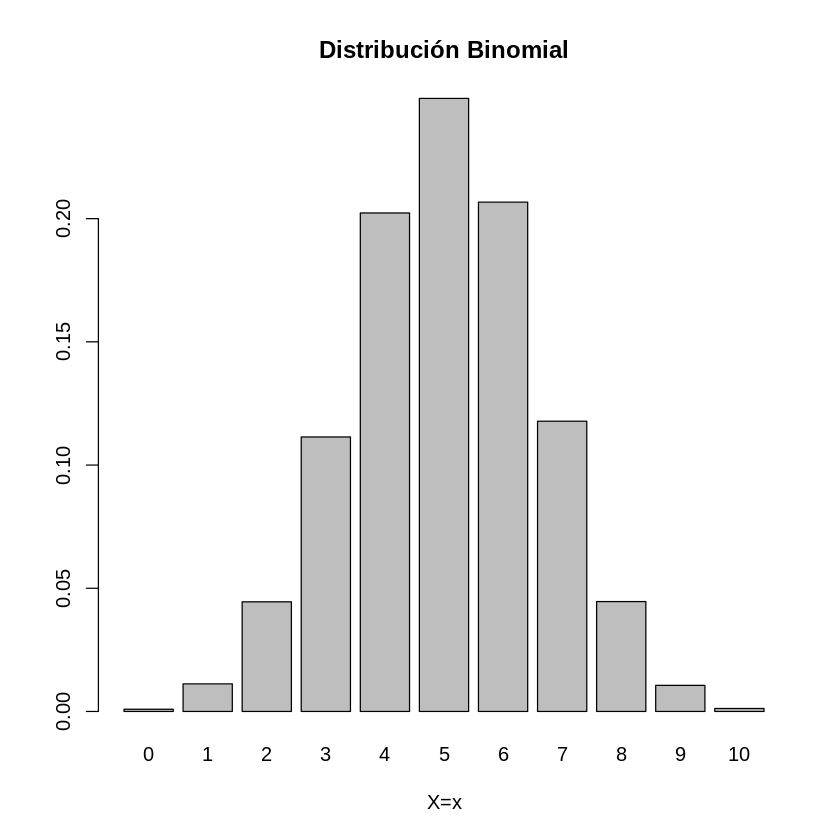

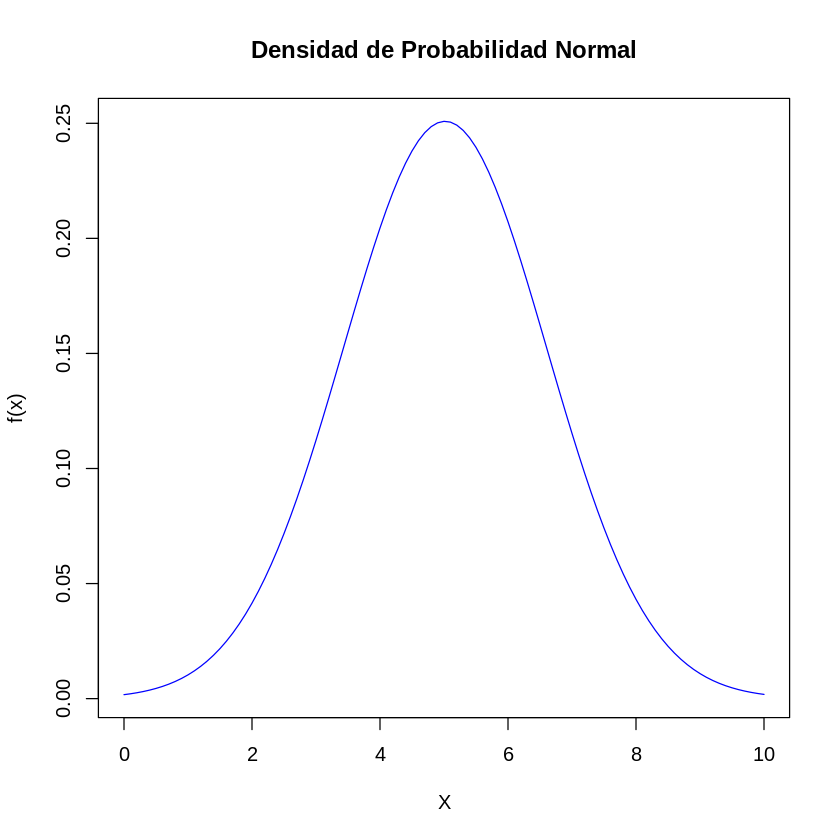

In [31]:

barplot(table(binom.aprox)/length(binom.aprox),
        main = "Distribución Binomial",
        xlab = "X=x")
curve(dnorm(x, mean = binom.mean, sd = binom.sd), from=0, to=10,
      col='blue', main = "Densidad de Probabilidad Normal",
      ylab = "f(x)", xlab = "X")

Ahora vamos a demostrar que la aproximación es buena, calculando el promedio y la
desviación estándar

In [32]:
normal.binom <- rnorm(100000, mean = binom.mean, sd = binom.sd)

mean(normal.binom)
sd(normal.binom)

[1] 5.020305

[1] 1.589807

# Distribución normal

La distribución normal es una distribución para variables aleatorias continuas,
por lo que, a diferencia de las distribuciones para variables discretas, la
probabilidad sólo puede calcularse para intervalos de valores.


Por ejemplo: dada la siguiente variable aleatoria normalmente distribuida:"

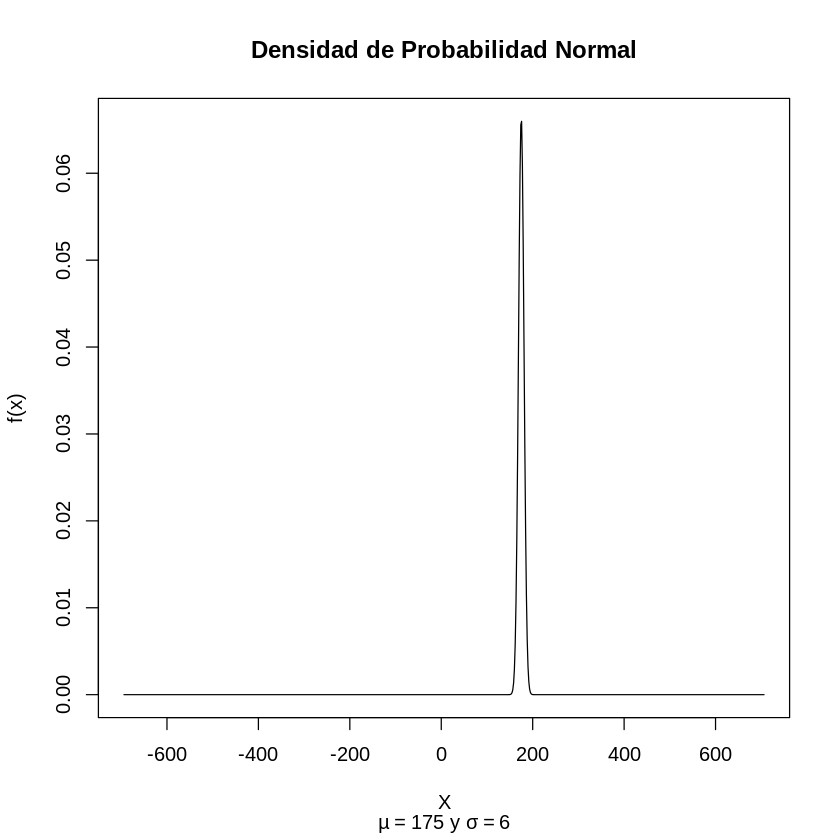

In [33]:
mean <- 175
sd <- 6
x <- seq(-4, 4, 0.01)*mean + sd
y <- dnorm(x, mean = mean, sd = sd)

plot(x, y, type = "l", xlab = "X", ylab = "f(x)",
     main = "Densidad de Probabilidad Normal",
     sub = expression(paste(mu == 175, " y ", sigma == 6)))

In [48]:
# Calcula la integral (área bajo la curva de la gráfica de anterior)
integrate(dnorm, lower = x[1], upper = x[length(x)], mean=binom.mean, sd = binom.sd)

1 with absolute error < 4.6e-07



---



Calcula P(X <= 180):

In [35]:

pnorm(q = 180, mean = mean, sd = sd)

[1] 0.7976716

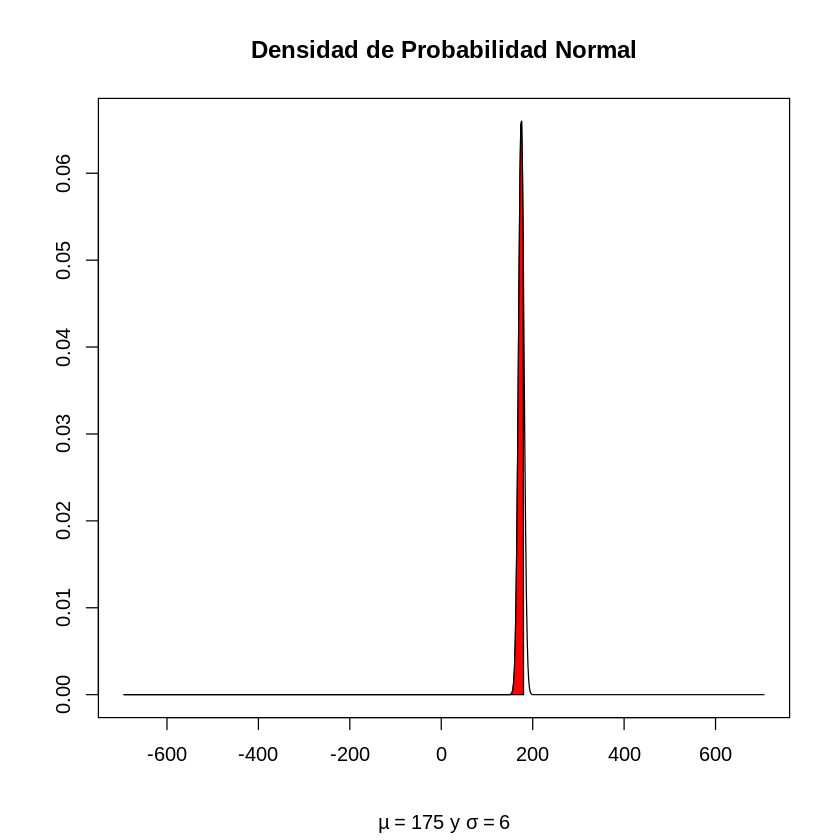

In [36]:
par(mfrow = c(1, 1))
plot(x, y, type = "l", xlab = "", ylab = "")
title(main = "Densidad de Probabilidad Normal", sub = expression(paste(mu == 175, " y ", sigma == 6)))
polygon(c(min(x), x[x<=180], 180), c(0, y[x<=180], 0), col="red")




---



Calcula P(X <= 165):

In [37]:
pnorm(q = 165, mean = mean, sd = sd)

[1] 0.04779035

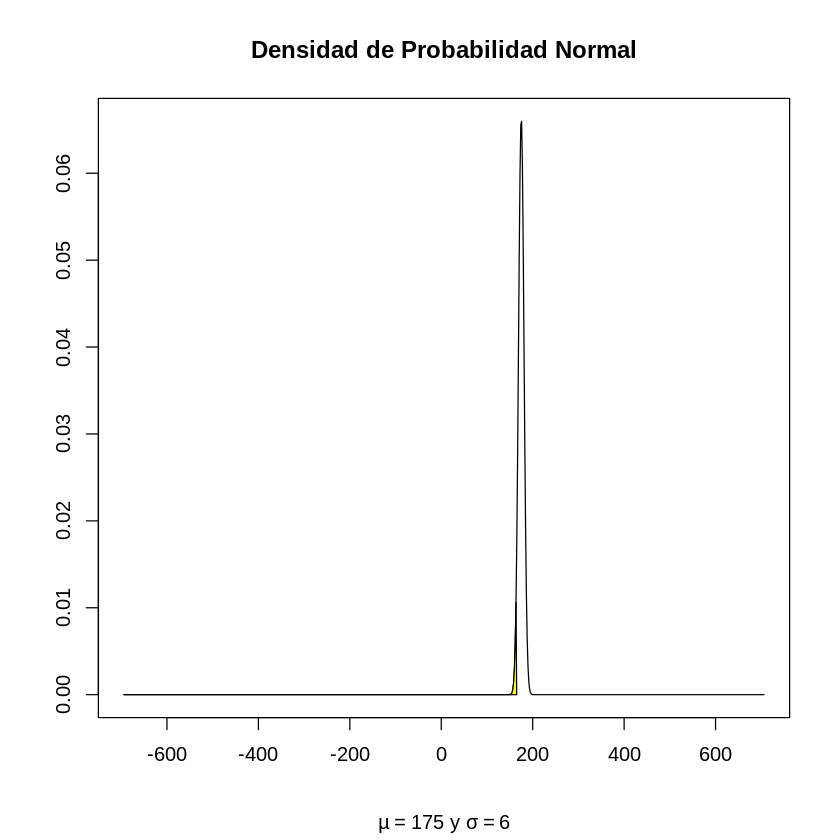

In [38]:
plot(x, y, type = "l", xlab = "", ylab = "")
title(main = "Densidad de Probabilidad Normal", sub = expression(paste(mu == 175, " y ", sigma == 6)))

polygon(c(min(x), x[x<=165], 165), c(0, y[x<=165], 0), col="yellow")




---

Calcula P(165 <= X <= 180):

In [39]:
pnorm(q = 180, mean = mean, sd = sd) - pnorm(q = 165, mean = mean, sd = sd)

[1] 0.7498813

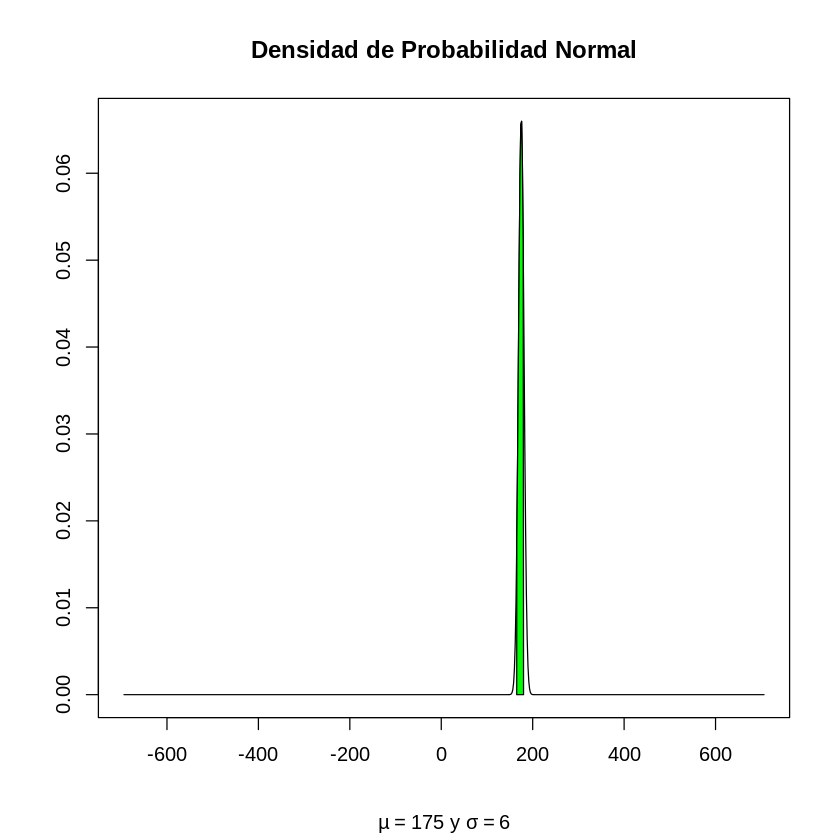

In [40]:
plot(x, y, type = "l", xlab="", ylab="")
title(main = "Densidad de Probabilidad Normal", sub = expression(paste(mu == 175, " y ", sigma == 6)))

polygon(c(165, x[x>=165 & x<=180], 180), c(0, y[x>=165 & x<=180], 0), col="green")



---

"Calcula P(X >= 182):"

In [41]:
pnorm(q = 182, mean = mean, sd = sd, lower.tail = FALSE)


[1] 0.1216725

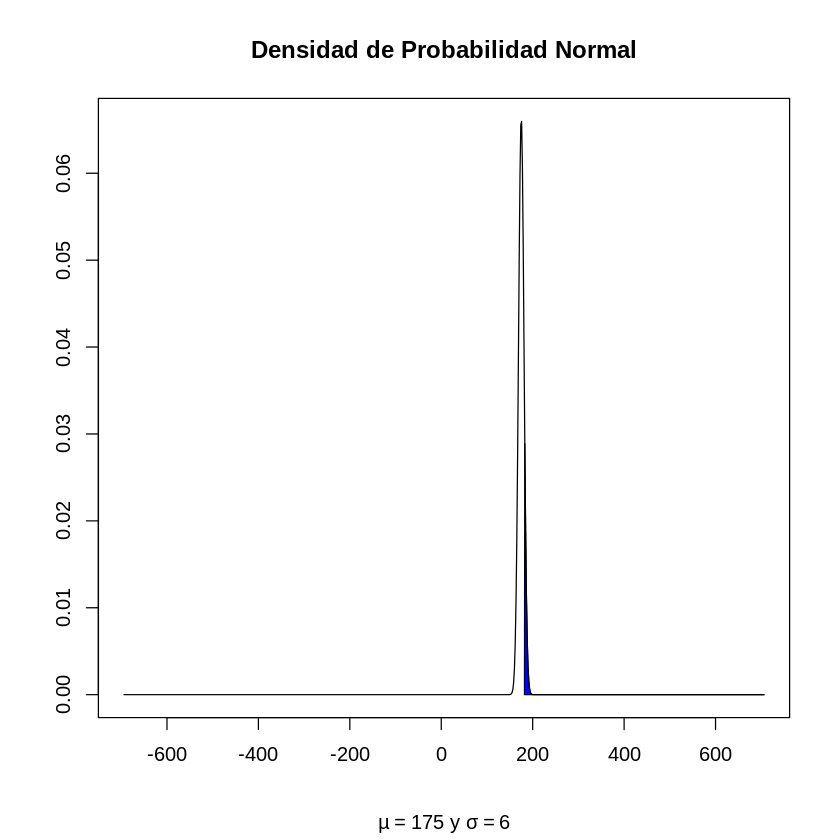

In [42]:
plot(x, y, type = "l", xlab="", ylab="")
title(main = "Densidad de Probabilidad Normal", sub = expression(paste(mu == 175, " y ", sigma == 6)))
polygon(c(182, x[x>=182], max(x)), c(0, y[x>=182], 0), col="blue")

Como con cualquier otra distribución, también podemos calcular los cuantiles de la distribución, es decir podemos encontrar el valor b, tal que P(X <= b) = 0.75


In [43]:
b <- qnorm(p = 0.75, mean = mean, sd = sd)
b

[1] 179.0469

In [44]:
# Podemos combrar el resultaso anterior calculando P(X <= 179.0469):"
pnorm(b, mean = mean, sd = sd)

[1] 0.75



---



# Distribución normal estándar y valores Z

La distribución normal estándar es un caso especial de la distribución normal
con media 0 y desviación estándar `1: Z ~ N(0,1)`. Esta distribución es de particular interés ya que todas las variables aleatorias `X ~ N(Media, SD) `pueden transformarse a Z, lo cual nos permite poder comparar variables normalmente distribuídas entre sí.

Para pasar de X a Z, es necesario 'estandarizar' la variable X de la siguiente forma:

`Z = (X - media)/ SD`


---


Por ejemplo: Sea `X ~ N(120, 85)`. Calcula la probabilidad de que X sea menor a 100

In [45]:
pnorm(q = 100, mean = 120, sd = 85)

[1] 0.4069902

"Estandarizando tenemos que Z ~ N(0,1), y el valor estandarizado de 100 es"

In [46]:
z <- (100-120)/85
z

[1] -0.2352941

Por lo tanto, la probabilidad de que Z sea menor a -0.2352941 es

In [47]:
pnorm(z)

[1] 0.4069902